# <span style="color:#4040a1; font-family: Trebuchet MS; font-size: 50px; font-weight: bold;">Google Stock Price Prediction</span>

In [29]:
import pandas as pd
import numpy as np
import random as rd
import datetime
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import statsmodels.tsa.api as smt
import statsmodels.api as sn
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv(r"C:\Users\rahim\Desktop\DSA 25\PYTHON\PYTHON 10\google-data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,652.704082,657.475653,647.433700,652.657015,652.657015,2.414928e+06
std,175.630574,176.627416,174.732814,175.820993,175.820993,1.672160e+06
min,350.053253,350.391052,345.512787,349.164032,349.164032,7.900000e+03
25%,528.287079,532.615204,524.232483,528.429413,528.429413,1.336900e+06
50%,600.002563,603.236511,594.453674,598.005554,598.005554,1.842300e+06
75%,774.015015,779.120025,768.662506,772.720001,772.720001,3.090850e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,2.328310e+07


In [6]:
#The date column format is object. We need to convert it to datetime format.
df['date'] = pd.to_datetime(df['Date']).dt.strftime('%d/%m/%y') 

In [7]:
df.drop(columns = ['Date'], inplace = True)

In [8]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,date
0,357.385559,361.151062,355.959839,359.288177,359.288177,5115500,02/01/13
1,360.122742,363.600128,358.031342,359.496826,359.496826,4666500,03/01/13
2,362.313507,368.339294,361.488861,366.600616,366.600616,5562800,04/01/13


In [9]:
data = pd.DataFrame()
data['date'] = pd.date_range(start='2013-01-02', end='2017-12-29')
data['date'] = data['date'].dt.strftime('%d/%m/%y')
data = data.merge(df,how = 'left', on = 'date')

In [10]:
data.shape

(1823, 7)

In [11]:
data.head(5)

,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5115500.0
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4666500.0
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5562800.0
3,05/01/13,NaN,NaN,NaN,NaN,NaN,NaN
4,06/01/13,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for n_col in numeric_columns :
    data[n_col] = data[n_col].interpolate(method = 'cubic')    

In [13]:
data.head(5)

,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5.115500e+06
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4.666500e+06
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5.562800e+06
3,05/01/13,363.672264,370.177059,364.091857,369.244832,369.244832,5.329146e+06
4,06/01/13,364.524566,369.314551,364.813292,367.666599,367.666599,4.257799e+06


In [14]:
a = sn.tsa.seasonal_decompose(data.Close.values, period = 365, model = 'additive')

In [15]:
m = sn.tsa.seasonal_decompose(data.Close.values, period = 365, model = 'multiplicative')

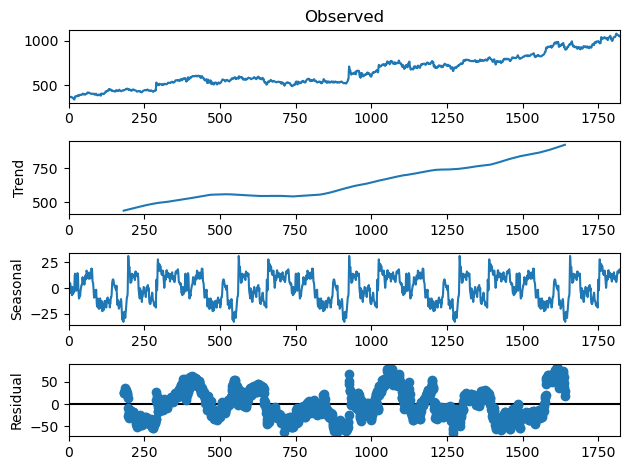

In [16]:
fig = a.plot()

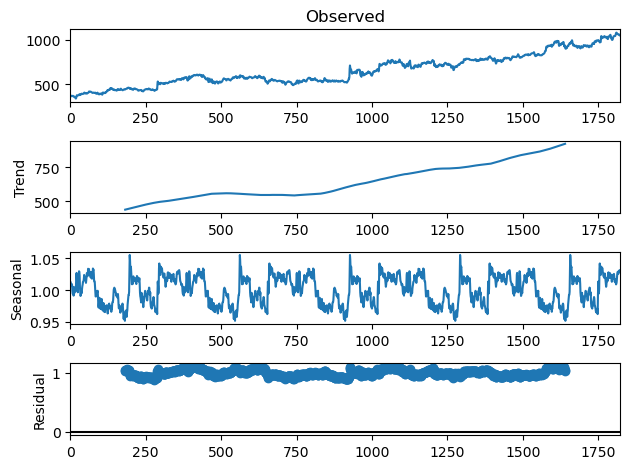

In [17]:
fig = m.plot()

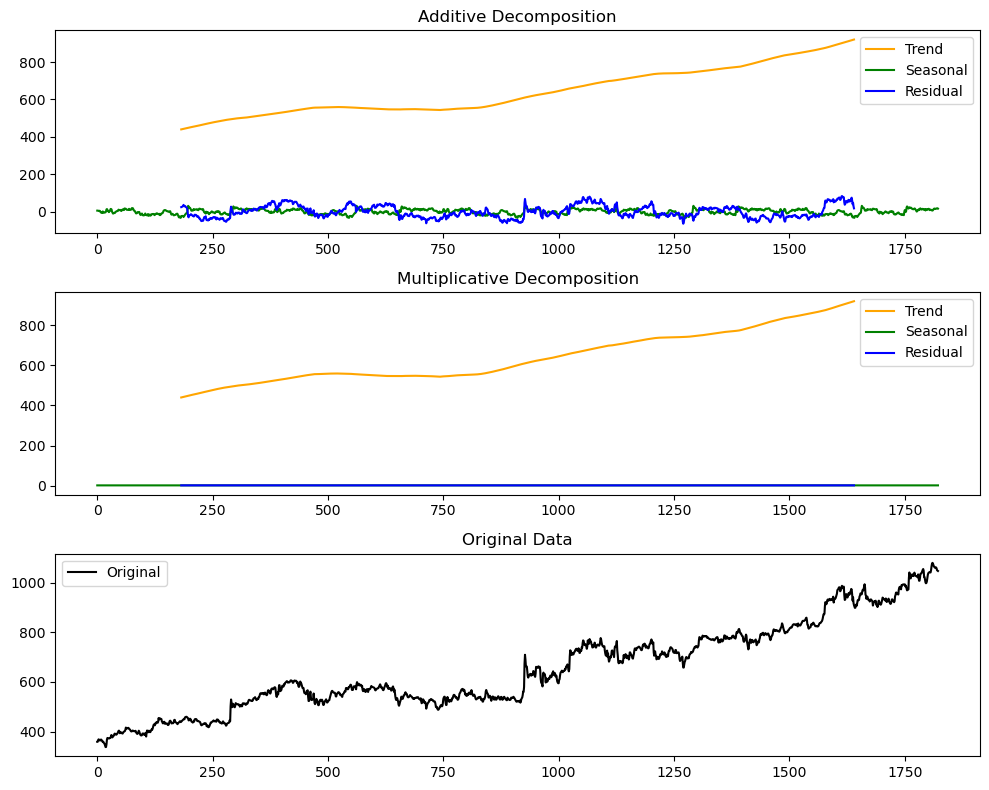

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Plot additive decomposition results
axes[0].set_title('Additive Decomposition')
axes[0].plot(data.index, a.trend, label='Trend', color='orange')
axes[0].plot(data.index, a.seasonal, label='Seasonal', color='green')
axes[0].plot(data.index, a.resid, label='Residual', color='blue')
axes[0].legend()

# Plot multiplicative decomposition results
axes[1].set_title('Multiplicative Decomposition')
axes[1].plot(data.index, m.trend, label='Trend', color='orange')
axes[1].plot(data.index, m.seasonal, label='Seasonal', color='green')
axes[1].plot(data.index, m.resid, label='Residual', color='blue')
axes[1].legend()

# Plot the original data
axes[2].set_title('Original Data')
axes[2].plot(data.index, data['Close'], label='Original', color='black')
axes[2].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [19]:
# Stationarity Check
def st_check (timeseries) :
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items() :
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [20]:
# if p value < 0.05, data is stationar
# Test statistic must be less than Critical value (5%)
st_check(data.Close)

Test Statistic                   -0.232731
p-value                           0.934506
#Lags Used                        5.000000
Number of Observations Used    1817.000000
Critical Value (1%)              -3.433954
Critical Value (5%)              -2.863132
Critical Value (10%)             -2.567618
dtype: float64


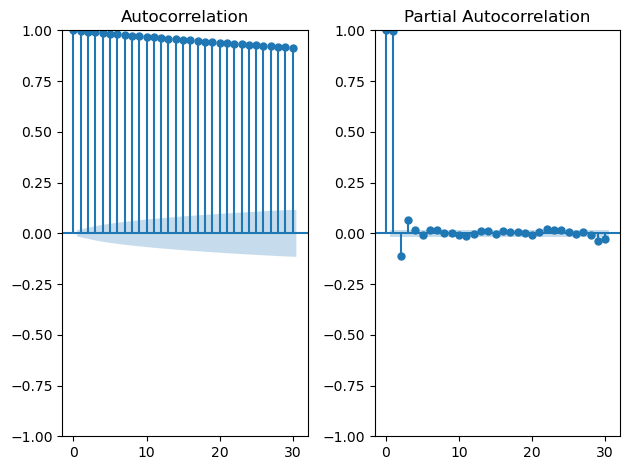

In [22]:
l = (1,2)
a = plt.subplot2grid(l, (0,0))
p = plt.subplot2grid(l, (0,1))
smt.graphics.plot_acf(data.Close, lags = 30, ax = a, alpha = 0.5)
smt.graphics.plot_pacf(data.Close, lags = 30, ax = p, alpha = 0.5)
plt.tight_layout()

In [23]:
model_df = data.loc[:, ['date', 'Close']].rename(columns = {'date':'ds', 'Close':'y'})

In [24]:
model_df.head(5)

,ds,y
0,02/01/13,359.288177
1,03/01/13,359.496826
2,04/01/13,366.600616
3,05/01/13,369.244832
4,06/01/13,367.666599


# <span style="color:#4040a1; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Modeling</span>

In [30]:
model = Prophet(yearly_seasonality = True, interval_width = 0.95)
model.fit(model_df)

23:21:46 - cmdstanpy - INFO - Chain [1] start processing
23:21:47 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
ft = model.make_future_dataframe(periods = 365)
pred = model.predict(ft)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2183,2018-12-25,1259.459087,1127.136924,1394.487948
2184,2018-12-26,1264.645127,1131.387905,1395.890766
2185,2018-12-27,1270.917695,1144.497311,1402.655519
2186,2018-12-28,1273.354935,1149.448595,1418.789581
2187,2018-12-29,1276.757979,1146.190978,1408.775369


<Figure size 1600x800 with 0 Axes>

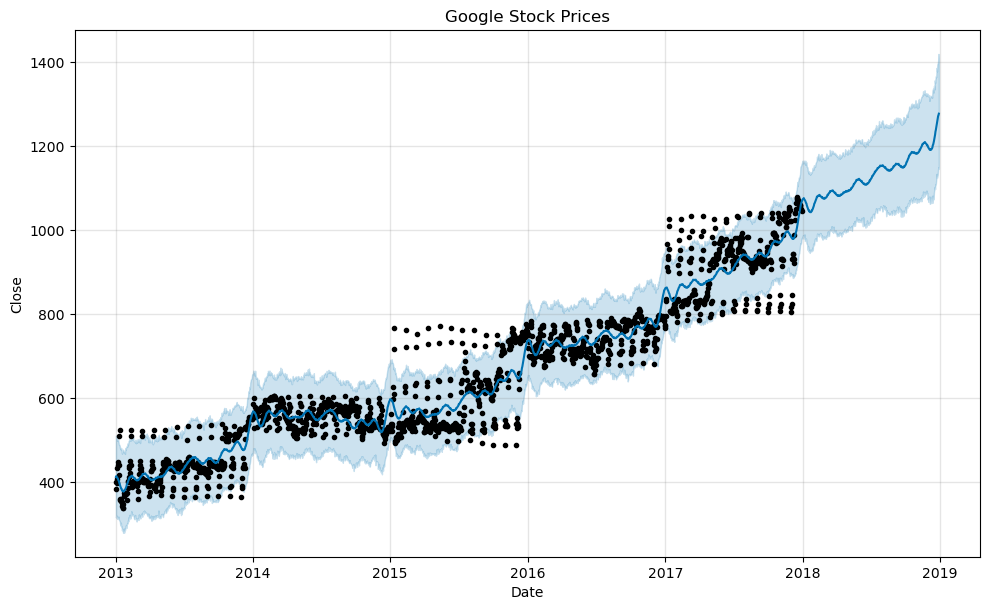

In [37]:
plt.figure(figsize = (16,8))
model.plot(pred, xlabel = 'Date', ylabel = 'Close')
plt.title('Google Stock Prices')
plt.show()

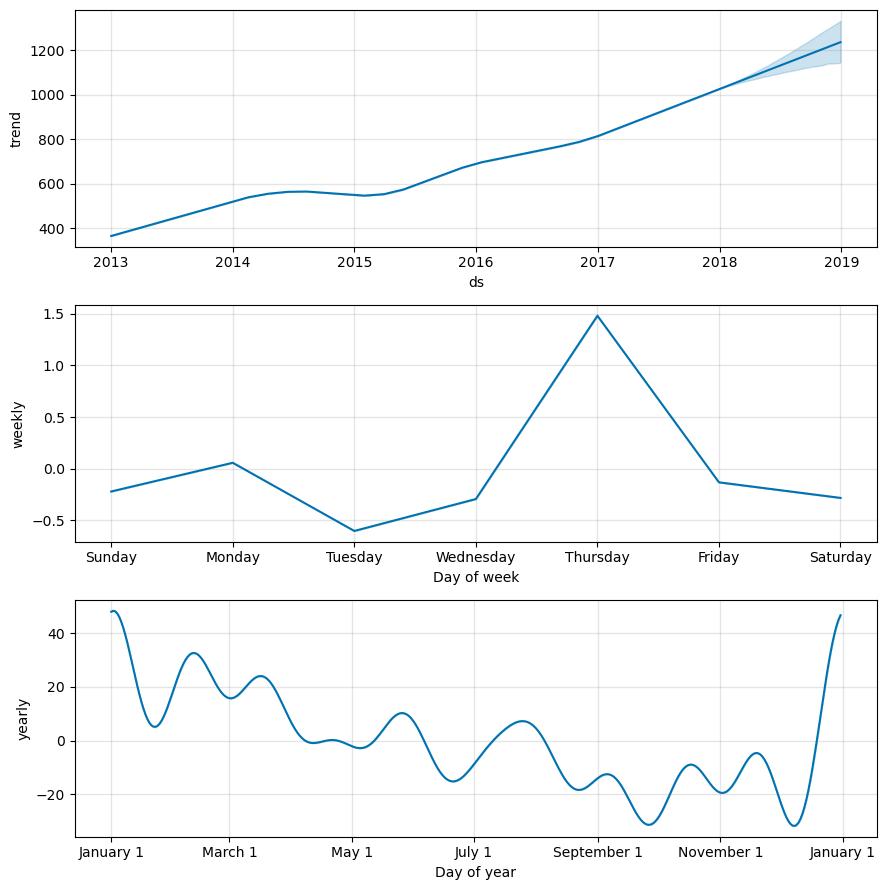

In [38]:
fig = model.plot_components(pred)

In [53]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
def optimization_function (changepoint_prior_scale, seasonality_prior_scale):
    model = Prophet(changepoint_prior_scale = changepoint_prior_scale, seasonality_prior_scale = seasonality_prior_scale).fit(model_df)
    cross_val = cross_validation(model, horizon = '300 days', parallel = 'processes')
    perf_m = performance_metrics(cross_val, rolling_window = 1)
    rmse = (perf_m['rmse'].values[0])
    print(rmse)
    return rmse

In [54]:
from bayes_opt import BayesianOptimization
parameters = {'changepoint_prior_scale': [0.001, 0.5],
              'seasonality_prior_scale': [0.01, 10],
             }

In [55]:
optimizer = BayesianOptimization(
    f = optimization_function,
    pbounds = parameters,
    random_state = 42,)

In [56]:
optimizer.maximize(init_points = 2, n_iter = 3,)

|   iter    |  target   | change... | season... |
-------------------------------------------------


00:57:26 - cmdstanpy - INFO - Chain [1] start processing
00:57:26 - cmdstanpy - INFO - Chain [1] done processing


86.62468822215807
| 1         | 86.62     | 0.1879    | 9.508     |


00:57:30 - cmdstanpy - INFO - Chain [1] start processing
00:57:30 - cmdstanpy - INFO - Chain [1] done processing


85.99168270425513
| 2         | 85.99     | 0.3663    | 5.991     |


00:57:34 - cmdstanpy - INFO - Chain [1] start processing
00:57:34 - cmdstanpy - INFO - Chain [1] done processing


85.77982758159216
| 3         | 85.78     | 0.2555    | 9.535     |


00:57:38 - cmdstanpy - INFO - Chain [1] start processing
00:57:38 - cmdstanpy - INFO - Chain [1] done processing


85.63901890177719
| 4         | 85.64     | 0.4144    | 3.01      |


00:57:42 - cmdstanpy - INFO - Chain [1] start processing
00:57:42 - cmdstanpy - INFO - Chain [1] done processing


93.33879799908638
| 5         | 93.34     | 0.05158   | 5.221     |


In [63]:
optimizer.res

[{'target': 86.62468822215807,
  'params': {'changepoint_prior_scale': 0.1878955193048339,
   'seasonality_prior_scale': 9.507635921035062}},
 {'target': 85.99168270425513,
  'params': {'changepoint_prior_scale': 0.36626497696389115,
   'seasonality_prior_scale': 5.990598257128395}},
 {'target': 85.77982758159216,
  'params': {'changepoint_prior_scale': 0.255546374463165,
   'seasonality_prior_scale': 9.535074229570423}},
 {'target': 85.63901890177719,
  'params': {'changepoint_prior_scale': 0.41439056336911745,
   'seasonality_prior_scale': 3.0097647379663908}},
 {'target': 93.33879799908638,
  'params': {'changepoint_prior_scale': 0.05157770144835909,
   'seasonality_prior_scale': 5.221455753189935}}]

# <span style="color:#4040a1; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">The best parameters and RMSE score</span>

In [65]:
optimizer.max

{'target': 93.33879799908638,
 'params': {'changepoint_prior_scale': 0.05157770144835909,
  'seasonality_prior_scale': 5.221455753189935}}